# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Packages for visualization
### YOUR CODE HERE ###
import seaborn as sns
from matplotlib import pyplot as plt

# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
from datetime import datetime
from datetime import timedelta
from datetime import date

# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


Cleaning and organizing the data, removing missing data, identifying independent and dependent variables, verifying assumptions, prepare the data for modeling.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
df0.shape
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
print('Number of NA values: %s' % df0.isna().sum())
df0 = df0.drop_duplicates()

Number of NA values: Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


Use `.describe()`.

In [5]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [6]:
# Check the format of the data
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'].head()

0     03/25/2017 8:55:43 AM
1     04/11/2017 2:53:28 PM
2     12/15/2017 7:26:56 AM
3     05/07/2017 1:17:59 PM
4    04/15/2017 11:32:20 PM
Name: tpep_pickup_datetime, dtype: object

In [7]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'], format = '%m/%d/%Y %I:%M:%S %p', errors = 'coerce')
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'], format = '%m/%d/%Y %I:%M:%S %p')

df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [8]:
df0['tpep_pickup_datetime'].dtype

dtype('<M8[ns]')

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
#Create a `duration` column
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1, 'm')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


In [10]:
df0['tpep_pickup_datetime'].dtype

dtype('<M8[ns]')

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [11]:
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

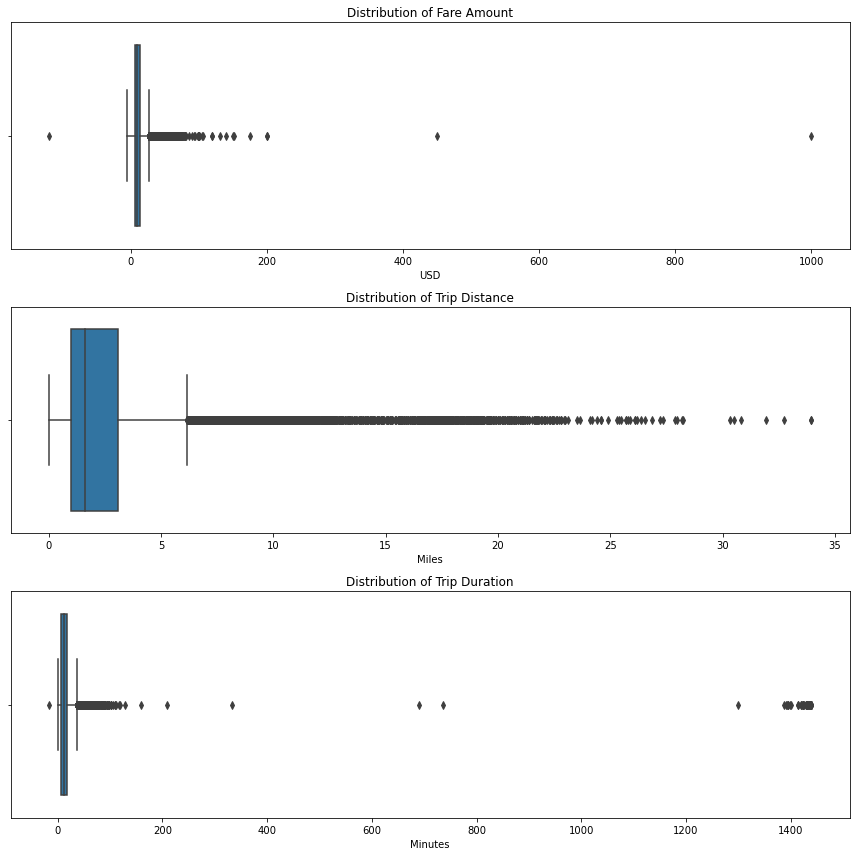

In [12]:
### YOUR CODE HERE ###
fig, axes = plt.subplots(3, 1, figsize = (12, 12))

sns.boxplot(df0['fare_amount'], ax = axes[0])
axes[0].set_title('Distribution of Fare Amount')
axes[0].set_xlabel('USD')

sns.boxplot(df0['trip_distance'], ax = axes[1])
axes[1].set_title('Distribution of Trip Distance')
axes[1].set_xlabel('Miles')

sns.boxplot(df0['duration'], ax = axes[2])
axes[2].set_title('Distribution of Trip Duration')
axes[2].set_xlabel('Minutes')

plt.tight_layout()


**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. All variables have outliers. The variables `duration_minutes` and `fare_amount` have extreme outliers. 
2. For the most part, values in `trip_distance` appear believable. However, there do appear to be several trips at 0.
3. There are negative values in `duration_minutes` and `fare_amount`, which are errorneous and need to be removed.

In [13]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
sorted(set(df0['trip_distance']))

[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.13,
 1.14,
 1.15,
 1.16,
 1.17,
 1.18,
 1.19,
 1.2,
 1.21,
 1.22,
 1.23,
 1.24,
 1.25,
 1.26,
 1.27,
 1.28,
 1.29,
 1.3,
 1.31,
 1.32,
 1.33,
 1.34,
 1.35,
 1.36,
 1.37,
 1.38,
 1.39,
 1.4,
 1.41,
 1.42,
 1.43,
 1.44,


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [15]:
### YOUR CODE HERE ###
(df0['trip_distance'] == 0).sum()

148

#### `fare_amount` outliers

In [16]:
### YOUR CODE HERE ###
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?
* There is a minimum value of -120 and a maximum value of 999.99. It seems unlikley that there was fare that enormous and negative fares simply don't make sense.


In [17]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
sum((df0['fare_amount'] < 0))

0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [18]:
### YOUR CODE HERE ###
def outlierimputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    # create for loop to iterate over columns and calculate IQR  
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0
        
        #calculate IQR
        percentile25 = df0[col].quantile(0.25)
        percentile75 = df0[col].quantile(0.75)
        iqr = percentile75 - percentile25
        
        print(col)
        print('percentile75: %f' % percentile75)
        print('iqr: %f' % iqr)
        
        # Calculate upper threshold
        upper_threshold = percentile75 + (iqr_factor * iqr)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

In [19]:
outlierimputer(['fare_amount'], 6)

fare_amount
percentile75: 14.500000
iqr: 8.000000
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [20]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [21]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df0.loc[df0['duration'] < 0, 'duration'] = 0

In [22]:
# Impute the high outliers
### YOUR CODE HERE ###
outlierimputer(['duration'], 6)

duration
percentile75: 18.383333
iqr: 11.733333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [23]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['PULocationID'].astype(str) + ' ' + df0['DOLocationID'].astype(str)

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [24]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff').mean()[['trip_distance']]
grouped[:5]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [25]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict = grouped_dict['trip_distance']
grouped_dict

{'1 1': 2.433333333333333,
 '10 148': 15.7,
 '100 1': 16.89,
 '100 100': 0.25333333333333335,
 '100 107': 1.18,
 '100 113': 2.024,
 '100 114': 1.94,
 '100 12': 4.55,
 '100 125': 2.84,
 '100 13': 4.201666666666667,
 '100 132': 17.2175,
 '100 137': 1.299,
 '100 138': 10.432857142857143,
 '100 140': 2.746,
 '100 141': 2.11,
 '100 142': 1.6958333333333335,
 '100 143': 1.5825,
 '100 144': 3.0066666666666664,
 '100 148': 4.1066666666666665,
 '100 151': 3.668,
 '100 152': 4.9,
 '100 158': 1.938,
 '100 161': 0.9813888888888889,
 '100 162': 1.2163636363636363,
 '100 163': 1.2656,
 '100 164': 0.841,
 '100 166': 5.199999999999999,
 '100 170': 0.8548,
 '100 177': 12.0,
 '100 181': 9.34,
 '100 186': 0.6404761904761904,
 '100 193': 4.39,
 '100 198': 9.01,
 '100 202': 5.3,
 '100 209': 4.43,
 '100 211': 2.48,
 '100 224': 1.9500000000000002,
 '100 225': 7.5,
 '100 229': 1.7850000000000001,
 '100 230': 0.72975,
 '100 231': 3.5216666666666665,
 '100 232': 3.8449999999999998,
 '100 233': 1.245833333333333

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [26]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)
# Confirm that it worked
### YOUR CODE HERE ###
df0.loc[(df0['PULocationID'] == 100) & (df0['DOLocationID'] == 100), 'mean_distance']

2805     0.253333
6878     0.253333
8197     0.253333
11626    0.253333
16359    0.253333
19225    0.253333
Name: mean_distance, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [27]:
#group by pickup_dropoff and calculate the mean of duration in minutes for each pickup/dropoff pair
grouped_duration = df0.groupby('pickup_dropoff').mean()[['duration']]

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
grouped_duration_dict = grouped_duration.to_dict()

#reassign the dictionary to remove the `duration_minutes` key, leaving the inner dictionary
grouped_duration_dict = grouped_duration_dict['duration']

#create a new column that is a copy of pickup_dropoff for dictionary mapping
df0['mean_duration'] = df0['pickup_dropoff']

#map values from dictionary to `mean_duration` column
df0['mean_duration'] = df0['mean_duration'].map(grouped_duration_dict)

# Confirm that it worked
### YOUR CODE HERE ###
df0.loc[(df0['PULocationID'] == 100) & (df0['DOLocationID'] == 100), 'mean_distance']

2805     0.253333
6878     0.253333
8197     0.253333
11626    0.253333
16359    0.253333
19225    0.253333
Name: mean_distance, dtype: float64

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [28]:
# Create 'day' col
### YOUR CODE HERE ###
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()


# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()
df0['day']

0        Saturday
1         Tuesday
2          Friday
3          Sunday
4        Saturday
           ...   
22694      Friday
22695      Sunday
22696      Monday
22697    Saturday
22698    Thursday
Name: day, Length: 22699, dtype: object

#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [29]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###
df0.loc[df0['day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0
df0['rush_hour'].value_counts()

0     6748
19    1081
18    1079
21    1011
20     972
22     906
8      878
9      876
17     854
14     848
15     843
12     794
11     790
16     790
10     767
13     761
7      742
23     733
6      436
1      224
5      182
2      165
4      117
3      102
Name: rush_hour, dtype: int64

In [30]:
### YOUR CODE HERE ###
def rush_hourizer(hour):
    if  6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 >= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [31]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###
df0.loc[(df0.day != 'Saturday') & (df0.day != 'Sunday'), 'rush_hour'] = df0.apply(rush_hourizer, axis = 1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,1
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

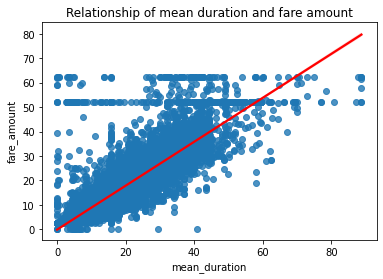

In [32]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
sns.regplot(x = df0['mean_duration'], 
            y = df0['fare_amount'],
            line_kws = {'color' :'red'})
plt.title('Relationship of mean duration and fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [33]:
### YOUR CODE HERE ###
with pd.option_context('display.max_columns', 30):
    print(df0[df0['fare_amount'] == 52].head(30))

      Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
11      18600059         2  2017-03-05 19:15:30   2017-03-05 19:52:18   
110     47959795         1  2017-06-03 14:24:57   2017-06-03 15:31:48   
161     95729204         2  2017-11-11 20:16:16   2017-11-11 20:17:14   
247    103404868         2  2017-12-06 23:37:08   2017-12-07 00:06:19   
379     80479432         2  2017-09-24 23:45:45   2017-09-25 00:15:14   
388     16226157         1  2017-02-28 18:30:05   2017-02-28 19:09:55   
406     55253442         2  2017-06-05 12:51:58   2017-06-05 13:07:35   
449     65900029         2  2017-08-03 22:47:14   2017-08-03 23:32:41   
468     80904240         2  2017-09-26 13:48:26   2017-09-26 14:31:17   
520     33706214         2  2017-04-23 21:34:48   2017-04-23 22:46:23   
569     99259872         2  2017-11-22 21:31:32   2017-11-22 22:00:25   
572     61050418         2  2017-07-18 13:29:06   2017-07-18 13:29:19   
586     54444647         2  2017-06-26 13:39:12   2

Examine the first 30 of these trips.

In [34]:
# Set pandas to display all columns
### YOUR CODE HERE ###
#pd.set_option('display.max_columns', none)#
df0[(df0['PULocationID'] == 132) | (df0['DOLocationID'] == 132) & (df0['fare_amount'] == 52)]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,March,0
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,...,11.52,0.3,111.38,88.783333,132 23,30.830000,88.783333,Monday,November,0
32,63600506,2,2017-07-26 23:26:50,2017-07-26 23:55:49,1,14.32,1,N,132,149,...,0.00,0.3,41.80,28.983333,132 149,14.320000,28.983333,Wednesday,July,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
137,72458348,1,2017-08-28 11:51:26,2017-08-28 12:20:34,1,9.00,1,N,132,265,...,0.00,0.3,28.80,29.133333,132 265,14.885833,30.073611,Monday,August,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22593,1690610,1,2017-01-20 18:05:09,2017-01-20 19:12:50,1,15.40,2,N,211,132,...,0.00,0.3,57.30,67.683333,211 132,16.580000,61.691667,Friday,January,0
22604,20742961,1,2017-03-12 17:56:04,2017-03-12 18:40:47,2,23.00,2,N,230,132,...,5.54,0.3,58.34,44.716667,230 132,18.148750,56.850000,Sunday,March,0
22620,52171010,2,2017-06-19 20:24:09,2017-06-19 21:01:04,3,20.96,2,N,132,261,...,0.00,0.3,58.30,36.916667,132 261,22.115000,51.493750,Monday,June,0
22670,17852208,1,2017-03-03 23:09:16,2017-03-03 23:09:35,1,0.00,1,N,132,132,...,0.00,0.3,3.80,0.316667,132 132,2.255862,3.021839,Friday,March,0


**Question:** What do you notice about the first 30 trips?

699 of the 715 trips with a fare of 52 dollars have location ID 132 either in the pickup ID or dropoff ID columns.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [35]:
### YOUR CODE HERE ###
model_data = df0[['VendorID', 'passenger_count', 'mean_duration', 'fare_amount', 'mean_distance', 'rush_hour']]
model_data

,VendorID,passenger_count,mean_duration,fare_amount,mean_distance,rush_hour
0,2,6,22.847222,13.0,3.521667,0
1,1,1,24.470370,16.0,3.108889,1
2,1,1,7.250000,6.5,0.881429,1
3,2,1,30.250000,20.5,3.700000,0
4,2,1,14.616667,16.5,4.435000,0
...,...,...,...,...,...,...
22694,2,3,8.594643,4.0,1.098214,0
22695,2,1,59.560417,52.0,18.757500,0
22696,2,1,6.609091,4.5,0.684242,1
22697,2,1,16.650000,10.5,2.077500,0


In [36]:
### YOUR CODE HERE ###

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

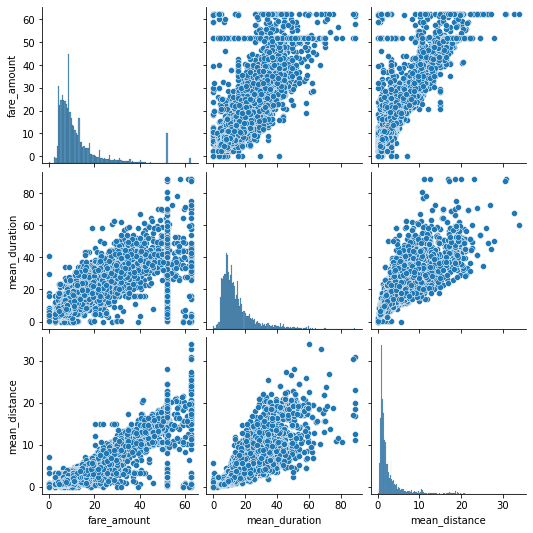

In [37]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(model_data[['fare_amount', 'mean_duration', 'mean_distance']])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [38]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
corr_matrix = model_data.corr()
corr_matrix

,VendorID,passenger_count,mean_duration,fare_amount,mean_distance,rush_hour
VendorID,1.000000,0.266463,0.001876,0.001045,0.004741,-0.002577
passenger_count,0.266463,1.000000,0.015852,0.014942,0.013428,-0.029742
mean_duration,0.001876,0.015852,1.000000,0.859105,0.874864,-0.001003
fare_amount,0.001045,0.014942,0.859105,1.000000,0.910185,0.020513
mean_distance,0.004741,0.013428,0.874864,0.910185,1.000000,-0.008743
rush_hour,-0.002577,-0.029742,-0.001003,0.020513,-0.008743,1.000000


Visualize a correlation heatmap of the data.

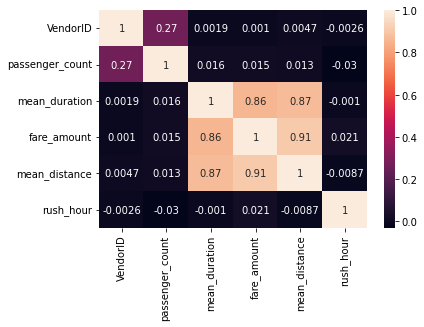

In [39]:
# Create correlation heatmap
### YOUR CODE HERE ###
sns.heatmap(corr_matrix, annot = True)

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [40]:
### YOUR CODE HERE ###

model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   mean_duration    22699 non-null  float64
 3   fare_amount      22699 non-null  float64
 4   mean_distance    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.7 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [41]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###
X = model_data.drop(columns = 'fare_amount')

# Set y variable
### YOUR CODE HERE ###
y = model_data[['fare_amount']]

# Display first few rows
### YOUR CODE HERE ###
X.head()

,VendorID,passenger_count,mean_duration,mean_distance,rush_hour
0,2,6,22.847222,3.521667,0
1,1,1,24.470370,3.108889,1
2,1,1,7.250000,0.881429,1
3,2,1,30.250000,3.700000,0
4,2,1,14.616667,4.435000,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [42]:
# Convert VendorID to string
### YOUR CODE HERE ###
X['VendorID'] = model_data['VendorID'].astype(str)

# Get dummies
### YOUR CODE HERE ###
X = pd.get_dummies(X, drop_first = True)
X.head()

,passenger_count,mean_duration,mean_distance,rush_hour,VendorID_2
0,6,22.847222,3.521667,0,1
1,1,24.470370,3.108889,1,0
2,1,7.250000,0.881429,1,0
3,1,30.250000,3.700000,0,1
4,1,14.616667,4.435000,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [43]:
# Create training and testing sets
#### YOUR CODE HERE ####
y_train, y_test, X_train, X_test = train_test_split(y, X, train_size = 0.8, test_size = 0.2, random_state = 0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [44]:
# Standardize the X variables
### YOUR CODE HERE ###
from sklearn import preprocessing
fitted_model = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = fitted_model.transform(X_train)

### Fit the model

Instantiate your model and fit it to the training data.

In [45]:
# Fit your model to the training data
### YOUR CODE HERE ###
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled, y_train)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [46]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r2 = model.score(X_train_scaled, y_train)
print('R2 value: %f' %r2)
y_pred_train = model.predict(X_train_scaled)
rss = np.sum(np.square(y_pred_train - y_train))
print('Residual Sum of Squares: %f' %rss ) 
print('Mean Absolute Error: %f' % mean_absolute_error(y_true = y_train, y_pred = y_pred_train))
print('Mean Squared Error: %f' % mean_squared_error(y_true = y_train, y_pred = y_pred_train))
print('Root Mean Squared Error: %f' %mean_squared_error(y_true = y_train, y_pred = y_pred_train, squared = False))

R2 value: 0.840359
Residual Sum of Squares: 323813.750871
Mean Absolute Error: 2.183158
Mean Squared Error: 17.832136
Root Mean Squared Error: 4.222811


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [47]:
# Scale the X_test data
### YOUR CODE HERE ###
X_test_scaled = fitted_model.transform(X_test)

In [48]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
r2 = model.score(X_test_scaled, y_test)
print('R2 value: %f' %r2)
y_pred_test = model.predict(X_test_scaled)
rss = np.sum(np.square(y_pred_test - y_test))
print('Residual Sum of Squares: %f' %rss ) 
print('Mean Absolute Error: %f' % mean_absolute_error(y_true = y_test, y_pred = y_pred_test))
print('Mean Squared Error: %f' % mean_squared_error(y_true = y_test, y_pred = y_pred_test))
print('Root Mean Squared Error: %f' %mean_squared_error(y_true = y_test, y_pred = y_pred_test, squared = False))

R2 value: 0.868998
Residual Sum of Squares: 64676.784427
Mean Absolute Error: 2.122509
Mean Squared Error: 14.245988
Root Mean Squared Error: 3.774386


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [49]:
# Create a `results` dataframe
### YOUR CODE HERE ###
results = pd.DataFrame({'actual': y_test['fare_amount'], 
                        'predicted' : y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results

,actual,predicted,residual
5818,14.0,12.197039,1.802961
18134,28.0,16.686393,11.313607
4655,5.5,7.107767,-1.607767
7378,15.5,16.601668,-1.101668
13914,9.5,10.916641,-1.416641
...,...,...,...
11108,21.5,21.065280,0.434720
7840,5.5,5.786494,-0.286494
8,9.0,6.993424,2.006576
16996,7.0,7.073600,-0.073600


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

Text(0, 0.5, 'Predicted y values')

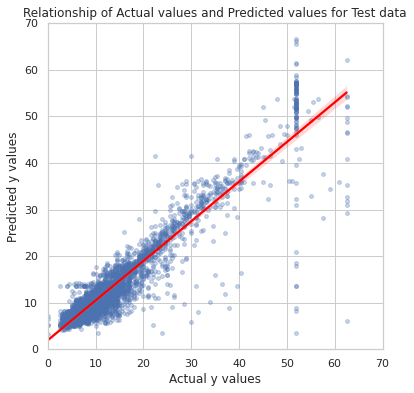

In [74]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###
plt.figure(figsize=(6, 6))
sns.set(style = 'whitegrid')
sns.regplot(x = results['actual'], y = results['predicted'], 
            scatter_kws = {'alpha' : 0.3, 's' : 15},
            line_kws = {'color' : 'red' })
plt.ylim([0, 70])
plt.xlim([0, 70])
plt.title('Relationship of Actual values and Predicted values for Test data')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')

Visualize the distribution of the `residuals` using a histogram.

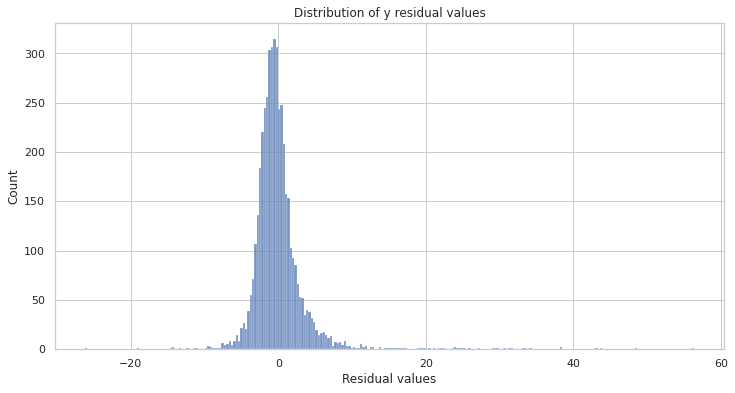

In [51]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
plt.figure(figsize = (12, 6))
sns.histplot(results['residual'])
plt.title('Distribution of y residual values')
plt.xlabel('Residual values')
plt.ylabel('Count')
plt.show()

In [52]:
# Calculate residual mean
### YOUR CODE HERE ###
residual_mean = results['residual'].mean()
print('Mean of residual values: %f' %residual_mean )

Mean of residual values: -0.016131


Create a scatterplot of `residuals` over `predicted`.

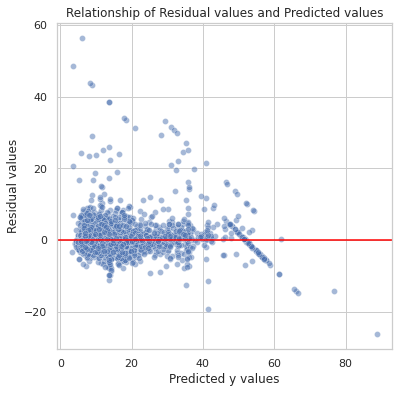

In [53]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
plt.figure(figsize = (6, 6))
sns.scatterplot(data = results, x = 'predicted', y = 'residual', alpha = 0.5)
plt.axhline(c = 'red')
plt.title('Relationship of Residual values and Predicted values')
plt.xlabel('Predicted y values')
plt.ylabel('Residual values')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [54]:
# Output the model's coefficients
coefficients = pd.DataFrame(data = model.coef_, columns = X.columns)
coefficients

,passenger_count,mean_duration,mean_distance,rush_hour,VendorID_2
0,0.036867,2.808862,7.134591,0.264216,-0.054767


What do these coefficients mean? How should they be interpreted?

These coefficients indicate the correlation of the independent variable with the dependent variable. When a coefficient is positive, this indicates that as the value of the independent variable increases, so does the mean of the dependent variable. If the coefficient is negative, then as the value of the independent variable increases, the mean of the dependent variable tends to decrease. The size of the coefficient indicates the strength of the relationship.
In this case, the third variable in the table, `mean_distance`, has the strongest correlation with `fare_amount`, followed by `mean_duration`, `rush_hour`, `passenger_count`, and `vendorID_2`.

#REVISED
While the above explanation is correct, it is not fully correct. The numbers above are represented in dollars of fare_amount and quantify the strength of the feature on the target variable. It must be noted that because the StandardScaler() function was used, the unit of `mean_distance` is no longer miles. So when intepreting this value, the correct interpretation is: controlling for other variables, when `mean_distance` increases by 1 standard deviation, `fare_amount` increases by $7.13. To return to miles, the data must be descaled.

In [55]:
print(X_train['mean_distance'].std())
print(7.13 / X_train['mean_distance'].std())

3.574812975256415
1.9945099364222203


Now that the data has been descaled, we can intepret a more useful meaning: For every 2 miles, `fare_amount` increases by $7.13.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



1 
* Preparation of the data is key - exploring, cleaning, sorting and organizing into a structure that is useful and appropriate for further analysis and model construction. 
* Outliers were addressed by calculating upper threshold for normal values and imputing that number into outliers.
* Negative values were removed and replaced by imputing 0.
* Features were egineered, by creating new variables to enhance analysis.
* Modeling variables were isolated, then examined for correlation
* Outcome variables were separated from the target variable, and a multiple linear regression model was trained and tested.
* Model assumptions were checked and model efficiency was evaluated.
   
2
* Of the variables from the dataset and from those created for analysis, 'mean_distance' has the highest correlation with 'fare_amount', followed by 'mean_duration'. 
* When using the 5 variables of `passenger_count`, `mean_duration`, `mean_distance`, `rush_hour`, and `vendorID_2`, the coeffeicient of determination is 0.87 for the testing data, meaning, these variables account for 87 percent of the variation in the target variable, `fare_amount`.
*  Evaluation metrics for test data
    * Residual Sum of Squares: 64676.784427
    * Mean Absolute Error: 2.122509
    * Mean Squared Error: 14.245988
    * Root Mean Squared Error: 3.774386
* To enhance model accuracy, adding other independent variables and removing those that did not have a high correlation may be considered.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 